In [20]:
from importlib import reload
from pyfvtool import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root
from tqdm import tqdm

import sys
sys.path.append('..')
from pymadreq import *
import pymadreq.coreflood as cf
import pymadreq.fractional_flow as ff
import pymadreq.IO as IO

reload(ff)
reload(cf)
reload(IO)

<module 'pymadreq.IO' from 'c:\\Users\\aaeft\\Documents\\GitHub\\PyMADREQ\\examples\\..\\pymadreq\\IO.py'>

## Reading input file and defining the domain

In [21]:
# read the input file
data = IO.read_json("../examples/sample.json")
rel_perm_ww, rel_perm_ow, pc_ww, pc_ow = IO.read_transport_functions(data)
core_plug = IO.read_core_properties(data)
fluids = IO.read_fluids(data)
IC = IO.read_initial_conditions(data) # initial conditions
BC = IO.createFloodingCondition(data["BC"]) # boundary conditions
numerical_params = IO.read_numerical_settings(data)
m = IO.read_flooding_domain(data)

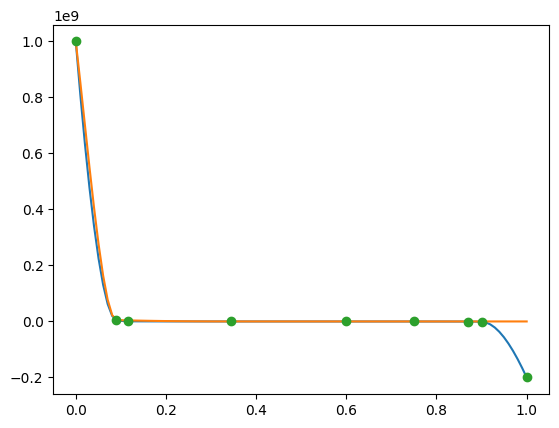

In [22]:
pc_ww.visualize()

In [23]:
cf_1d = cf.CoreFlooding1D(
    rel_perm_ww, pc_ww, core_plug, fluids, IC, BC, numerical_params, Nx=30
)

In [24]:
t_num, R_num, dp_num = cf_1d.simulate_no_pc()
t_num_pc, R_num_pc, dp_num_pc = cf_1d.simulate_with_pc()


## Transport properties

In [25]:
xt_shock, sw_shock, xt_prf, sw_prf, t_ana, p_inj_ana, R_oil_ana = ff.frac_flow_wf(
    fluids, rel_perm_ww, core_plug, IC, ut=cf_1d.u_inj, sw_inj=1.0, pv_inj=3.0)

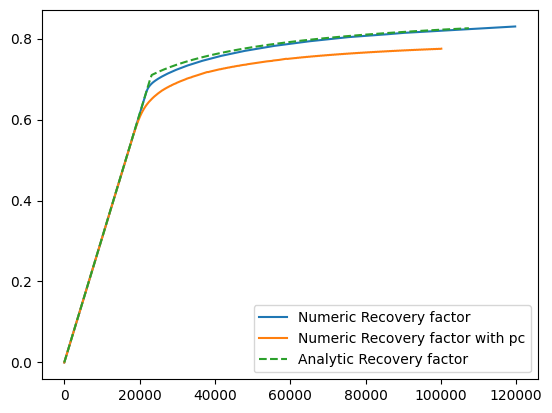

In [26]:
plt.plot(t_num, R_num, label= 'Numeric Recovery factor')
plt.plot(t_num_pc, R_num_pc, label= 'Numeric Recovery factor with pc')
plt.plot(t_ana, R_oil_ana, '--', label= 'Analytic Recovery factor')
plt.legend()

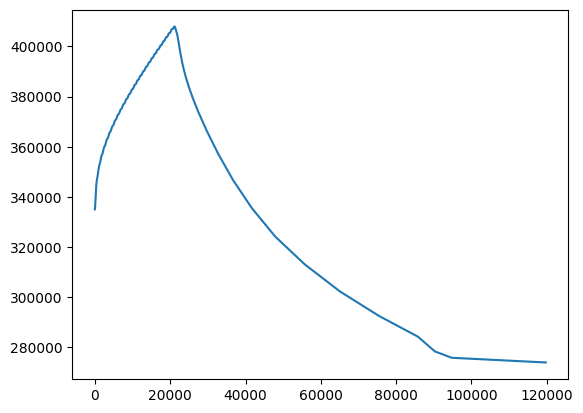

In [27]:
plt.plot(t_num, dp_num, label= 'Numeric Pressure drop')

In [28]:
cf_1d.final_sw.value


array([1.1540147 , 0.8459853 , 0.84317022, 0.84045014, 0.83780739,
       0.83522751, 0.83269817, 0.83020828, 0.82774745, 0.82530524,
       0.82287113, 0.82043282, 0.81797824, 0.81548931, 0.81295205,
       0.81033448, 0.80762297, 0.80475434, 0.80172188, 0.79839648,
       0.79478924, 0.79063392, 0.78597524, 0.78023234, 0.77354562,
       0.76443991, 0.75384017, 0.73748624, 0.72006435, 0.68119035,
       0.64408506, 0.55591494])

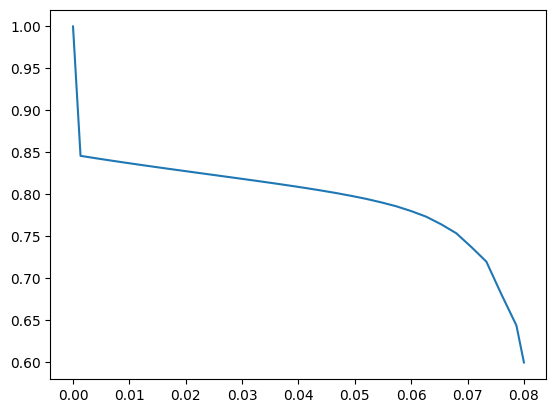

In [29]:
visualizeCells(cf_1d.final_sw)

## Fittin model to core flooding data

In [30]:
# using lmfit to fit a two-phase model to a dataset
# from lmfit import minimize, Parameters
# def residual(params, x, data):
#     amp = params['amp']
#     phaseshift = params['phase']
#     freq = params['frequency']
#     decay = params['decay']

#     model = amp * np.sin(x*freq + phaseshift) * np.exp(-x*x*decay)

#     return (data-model)


# params = Parameters()
# params.add('amp', value=10)
# params.add('decay', value=0.007)
# params.add('phase', value=0.2)
# params.add('frequency', value=3.0)

# out = minimize(residual, params, args=(x, data))

In [31]:
cf2d = cf.CoreFlooding2D(
    rel_perm_ww, pc_ww, core_plug, fluids, IC, BC, numerical_params, Nx=20, Nr = 5
)

In [32]:
t, r, dp = cf2d.simulate_no_pc()
t_pc, r_pc, dp_pc = cf2d.simulate_with_pc()

In [33]:
cf2d.final_sw.value[1,:]

array([1.15552276, 0.84447724, 0.84028269, 0.83627132, 0.83239121,
       0.82860026, 0.82486005, 0.82113122, 0.81736903, 0.81351808,
       0.80950518, 0.80522878, 0.80054192, 0.79522246, 0.78891837,
       0.78104104, 0.77051246, 0.7556023 , 0.73313828, 0.69878141,
       0.61041714, 0.58958286])

In [34]:
cf2d.initial_sw.value[1,:]

array([1.91, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
       0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09])

In [35]:
cf_1d.final_sw.value

array([1.1540147 , 0.8459853 , 0.84317022, 0.84045014, 0.83780739,
       0.83522751, 0.83269817, 0.83020828, 0.82774745, 0.82530524,
       0.82287113, 0.82043282, 0.81797824, 0.81548931, 0.81295205,
       0.81033448, 0.80762297, 0.80475434, 0.80172188, 0.79839648,
       0.79478924, 0.79063392, 0.78597524, 0.78023234, 0.77354562,
       0.76443991, 0.75384017, 0.73748624, 0.72006435, 0.68119035,
       0.64408506, 0.55591494])

In [36]:
cf2d.final_pressure.value[1,:]

array([10315815.42730286, 10312420.12185023, 10298995.68743141,
       10285396.73201456, 10271628.58584071, 10257694.5971239 ,
       10243596.41987917, 10229334.0556737 , 10214905.68716449,
       10200307.28683806, 10185531.93559311, 10170568.72100172,
       10155400.97669908, 10140003.42095827, 10124337.31163792,
       10108341.74089863, 10091916.88625635, 10074888.38149614,
       10056939.72538408, 10037493.15753064, 10015193.27217535,
        9984806.72782465])

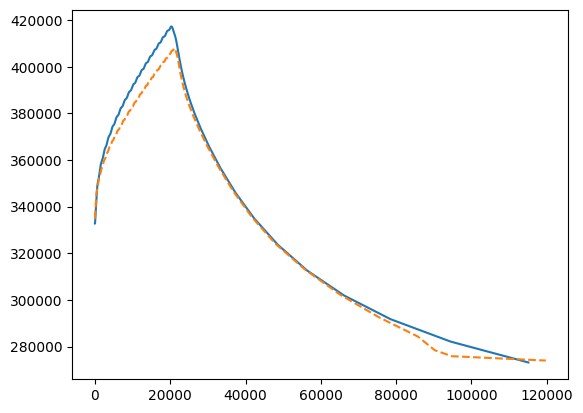

In [37]:
plt.plot(t, dp, t_num, dp_num, '--')

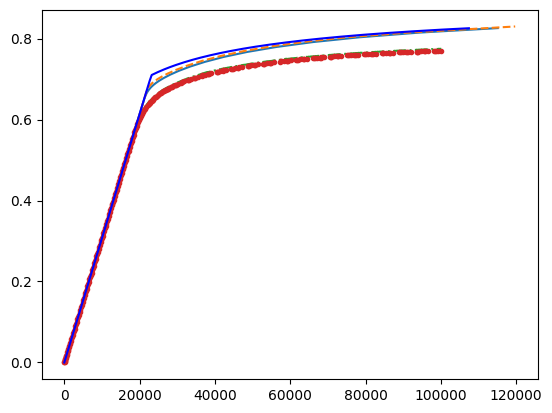

In [38]:
plt.plot(t, r, 
         t_num, R_num, '--', 
         t_num_pc, R_num_pc, '-.', 
         t_pc, r_pc, '.',
         t_ana, R_oil_ana, 'b')